<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/improve_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

## Data Load

In [52]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [53]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
#Hapus fitur yg tidak relevan dan terlalu banyak null
col_not_relevan=['PassengerId','Name','Ticket','Cabin']
df.drop(columns=col_not_relevan, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
#Impute Data null AGE dan EMBARKED
df.Age.fillna(df.Age.mean(), inplace=True)
df.Embarked.fillna('S', inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [57]:
##Label Encoder and Scaling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler

In [58]:
le=LabelEncoder()
col_category=['Sex','Embarked']
df[col_category]=df[col_category].apply(lambda x: le.fit_transform(x))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Splitting Fiture-Target and Train-Test

In [59]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, shuffle=y, random_state=42)

## Modeling - KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [63]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [77]:
scores = cross_val_score(knn, X, y, cv=5)
scores.mean()

0.694771200803465

## Evaluasi Model

In [64]:
akurasi=accuracy_score(y_test,y_pred)*100
presisi=precision_score(y_test,y_pred)*100
recall=recall_score(y_test,y_pred)*100

print(f'Akurasi ={akurasi}%')
print(f'Presisi ={presisi}%')
print(f'Recall ={recall}%')


Akurasi =71.30044843049326%
Presisi =65.06024096385542%
Recall =60.67415730337079%


##Improvement with scaling

In [65]:
scl=MinMaxScaler()

scl.fit(x_train)
x_train_scl=scl.transform(x_train)
x_test_scl=scl.transform(x_test)

In [66]:
knn_scl=KNeighborsClassifier()
knn_scl.fit(x_train_scl,y_train)
y_pred_scl=knn_scl.predict(x_test_scl)

## Evaluasi Model

In [67]:
akurasi_scl=accuracy_score(y_test,y_pred_scl)*100
presisi_scl=precision_score(y_test,y_pred_scl)*100
recall_scl=recall_score(y_test,y_pred_scl)*100

print(f'Akurasi setelah scaling={akurasi_scl}%')
print(f'Presisi setelah scaling={presisi_scl}%')
print(f'Recall setelah scaling={recall_scl}%')


Akurasi setelah scaling=80.71748878923766%
Presisi setelah scaling=79.48717948717949%
Recall setelah scaling=69.66292134831461%


##Improvement Model with Tuning Parameter

In [68]:
n=range(1,120,2)
train_score,test_score=[],[]

for k in n:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train_scl,y_train)
  train_score.append(model.score(x_train_scl,y_train))
  test_score.append(model.score(x_test_scl,y_test))


In [69]:
##Ploting hasil tuning
import matplotlib.pyplot as plt

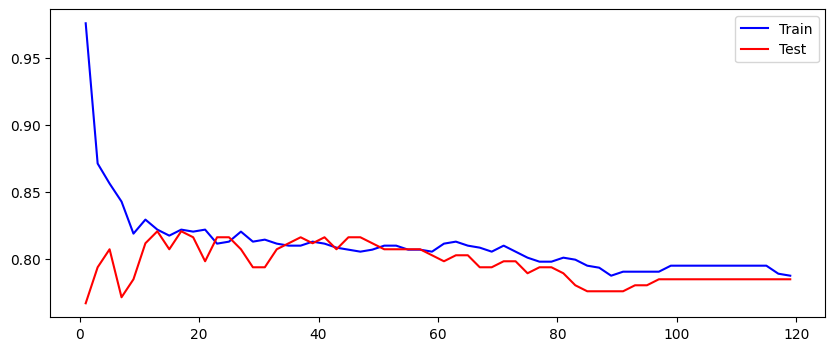

In [71]:
plt.figure(figsize=(10,4))
plt.plot(n,train_score, label='Train', color='b')
plt.plot(n,test_score, label='Test', color='r')
plt.legend()
plt.show()

In [72]:
max(test_score)

0.820627802690583

In [ ]:
test_score

In [ ]:
import numpy as np

In [74]:
n[np.argmax(test_score)]

13